## Wrangling the Billboard Top 100  

Consider the data in [billboard.csv](../data/billboard.csv) containing every song to appear on the weekly [Billboard Top 100](https://www.billboard.com/charts/hot-100/) chart since 1958, up through the middle of 2021.  Each row of this data corresponds to a single song in a single week.  For our purposes, the relevant columns here are:

- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.

 Use your skills in data wrangling and plotting to answer the following three questions.   

### Part A:  
Make a table of the top 10 most popular songs since 1958, as measured by the _total number of weeks that a song spent on the Billboard Top 100._  Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.    

Your table should have __10 rows__ and __3 columns__: `performer`, `song`, and `count`, where `count` represents the number of weeks that song appeared in the Billboard Top 100.  Make sure the entries are sorted in descending order of the `count` variable, so that the more popular songs appear at the top of the table.  Give your table a short caption describing what is shown in the table.  

(_Note_: you'll want to use both `performer` and `song` in any `group_by` operations, to account for the fact that multiple unique songs can share the same title.)  

In [158]:
# Import data into dataframe
import pandas as pd
dataframe = pd.read_csv('billboard.csv')

df = dataframe[['performer','song','year','week','week_position']].copy()
df['year_week'] = df['year'].astype(str) + '_' + df['week'].astype(str)

# Grouping by performer and song and counting weeks
df2 = df[['performer','song','year_week']].drop_duplicates()
df3 = df2.groupby(['performer','song']).agg({'year_week':'count'}).rename(columns = {'year_week':'count'})

# Sorting on desceding count and printing top 10 rows
df3.sort_values('count' , ascending = False)[:10]

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
OneRepublic,Counting Stars,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


###  Part B: 
Is the "musical diversity" of the Billboard Top 100 changing over time?  Let's find out.  We'll measure the musical diversity of given year as _the number of unique songs that appeared in the Billboard Top 100 that year._  Make a line graph that plots this measure of musical diversity over the years.  The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year.  For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years.   Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.  

There are number of ways to accomplish the data wrangling here.  For example, you could use two distinct sets of data-wrangling steps.  The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year.  The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, _irrespective of how many times_ it had appeared.

<Axes: title={'center': 'Plot Showing diversity of songs in Billboard Top 100 over the years'}, xlabel='year', ylabel='No of unique songs in Billboard Top 100'>

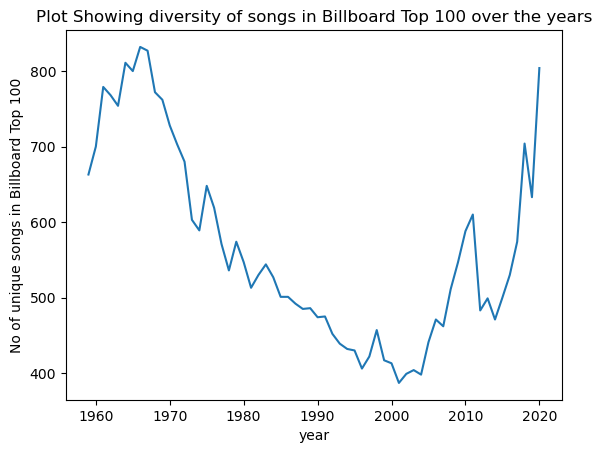

In [55]:
filter1 = ~dataframe['year'].isin([1958,2021])
dataframe[filter1].groupby('year').agg({'song_id':'nunique'}).plot(title = "Plot Showing diversity of songs in Billboard Top 100 over the years", xlabel = 'year' , ylabel = 'No of unique songs in Billboard Top 100' , legend = False)

Song Diversity in the Billboard Top 100 chart increases initially till the late 1960s but then experiences a dip until 2000.After 2000 the diversity again starts increasing.

Following factors could explain the trend:
 - 1960s and 1970s can be considered the Golden era of Music industry during which many new artists and bands rocked the scene with new genres of music!
 - After gaining popularity and the advent of record albums and singles , some bands and artists started gaining popularity among the masses and dominated the scene hence showing a decline in the diversity for most popular songs around the world. Music industry became more consolidated.
- With the onset of internet and with its streaming services , independent and smaller artists also had the resources to go global and the music industry was flooded with new artists and songs . The popularity of songs became more dynamic and hence we see a sharp increase in diversity after  the 2000s.

### Part C:
Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks.  There are 19 artists in U.S. musical history since 1958 who have had _at least 30 songs_ that were "ten-week hits."  Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career.   Give the plot an informative caption in which you explain what is shown.


_Notes_:  

1) You might find this easier to accomplish in two distinct sets of data wrangling steps.
2) Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together.  If you find that your plot isn't readable with vertical bars, you can add a `coord_flip()` layer to your plot to make the bars (and labels) run horizontally instead.
3) By default a bar plot will order the artists in alphabetical order.  This is acceptable to turn in.  But if you'd like to order them according to some other variable, you can use the `fct_reorder` function, described in [this blog post](https://datavizpyr.com/re-ordering-bars-in-barplot-in-r/).  This is optional.


In [168]:
dataframe['year_week'] = dataframe['year'].astype(str) + '_' + dataframe['week'].astype(str)

# Creating Mask for 10 week hit
mask = dataframe[['song_id','year_week']].groupby(['song_id']).nunique('year_week')
mask.sort_values('year_week',ascending = False,inplace = True)
mask = mask['year_week'] >= 10

# Creating 10 week hit variable using the above mask
dataframe['ten_week_hit'] = dataframe['song_id'].map(mask)

# dataframe
# dataframe[dataframe['ten_week_hit'] == True]['performer'].value_counts()[:10]
# (dataframe[dataframe['ten_week_hit'] == True].groupby('performer').agg({'song_id':'nunique'}) >= 30).sum()

In [169]:
# Counting no of 10 week hits per performer who have more than 30 10-week hits
filtered_df= dataframe[dataframe['ten_week_hit'] == True]
filtered_df = dataframe[dataframe['ten_week_hit'] == True].groupby('performer').agg({'song_id':'nunique'}).rename(columns = {'song_id':'nof_10week_hits'})
filtered_df = filtered_df[filtered_df['nof_10week_hits'] >= 30]


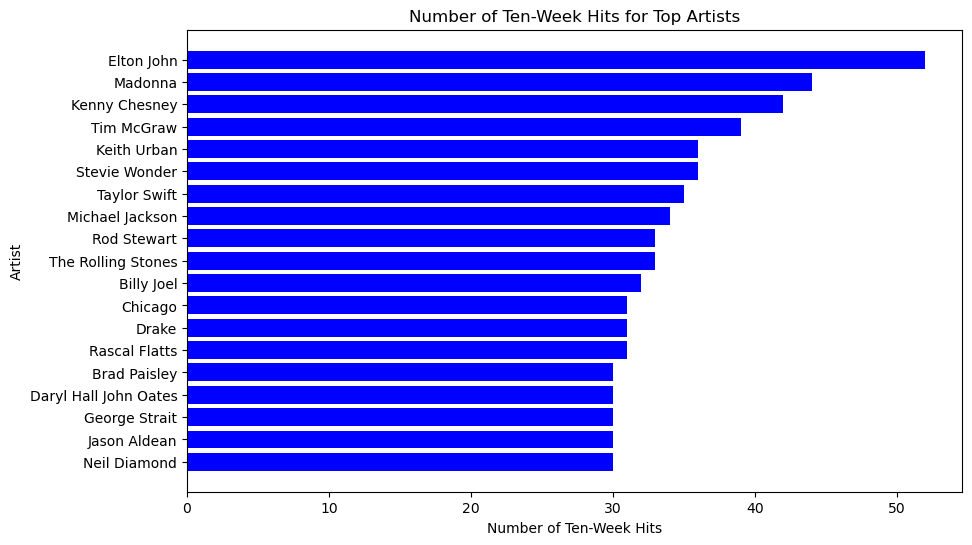

In [170]:
# Sorting the dataframe on no of 10 week hits
filtered_df.reset_index(inplace = True)
filtered_df.sort_values(['nof_10week_hits','performer'] , ascending = [False,True] , inplace = True)


# Plotting the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(filtered_df['performer'], filtered_df['nof_10week_hits'], color='blue')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.title('Number of Ten-Week Hits for Top Artists')
plt.gca().invert_yaxis()  # To display artists with the highest hits at the top
plt.show()